In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv(r"C:\Users\Varshith\OneDrive\Desktop\nipah_dataset2.csv")

X = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [16]:
encoder_feature_names = ct.named_transformers_['encoder'].get_feature_names_out([data_set.columns[1]])
numeric_feature_names = data_set.columns.drop(data_set.columns[1])
all_feature_names = list(encoder_feature_names) + list(numeric_feature_names[1:])

In [17]:
print("Shape of X:", X.shape)
print("Number of feature names:", len(all_feature_names))
print("Feature names:", all_feature_names)

Shape of X: (70, 7)
Number of feature names: 7
Feature names: ['Body Temp_High', 'Body Temp_Low', 'Body Temp_Moderate', 'Headache(pain scale)', 'Blood O2 Level(%) Sp02', 'Anti Bodies', 'platelets']


In [18]:
if X.shape[1] != len(all_feature_names):
    print("Mismatch between the number of columns in X and the feature names.")
else:
    # Convert back to DataFrame to include column names for visualization
    X_df = pd.DataFrame(X, columns=all_feature_names)

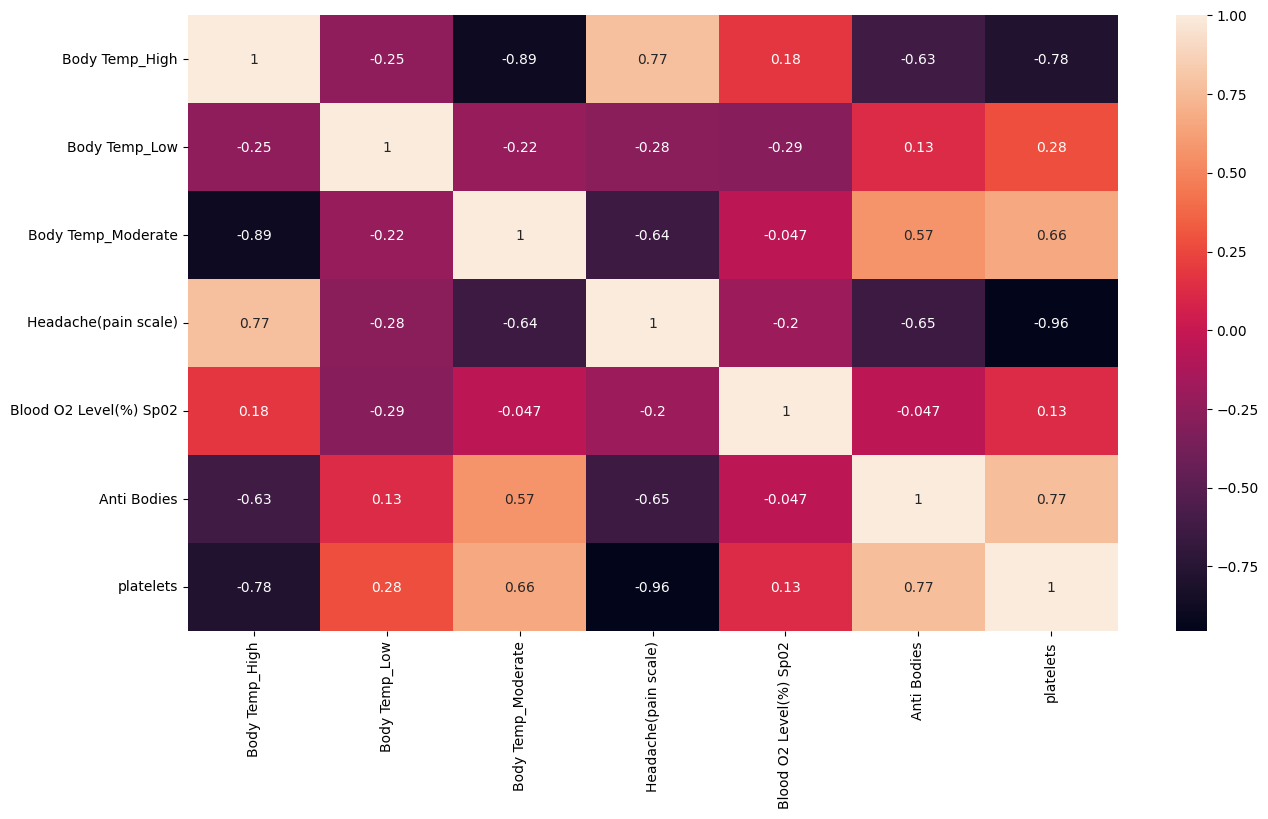

In [20]:
plt.figure(figsize=(15, 8))
sns.heatmap(X_df.corr(), annot=True)
plt.show()

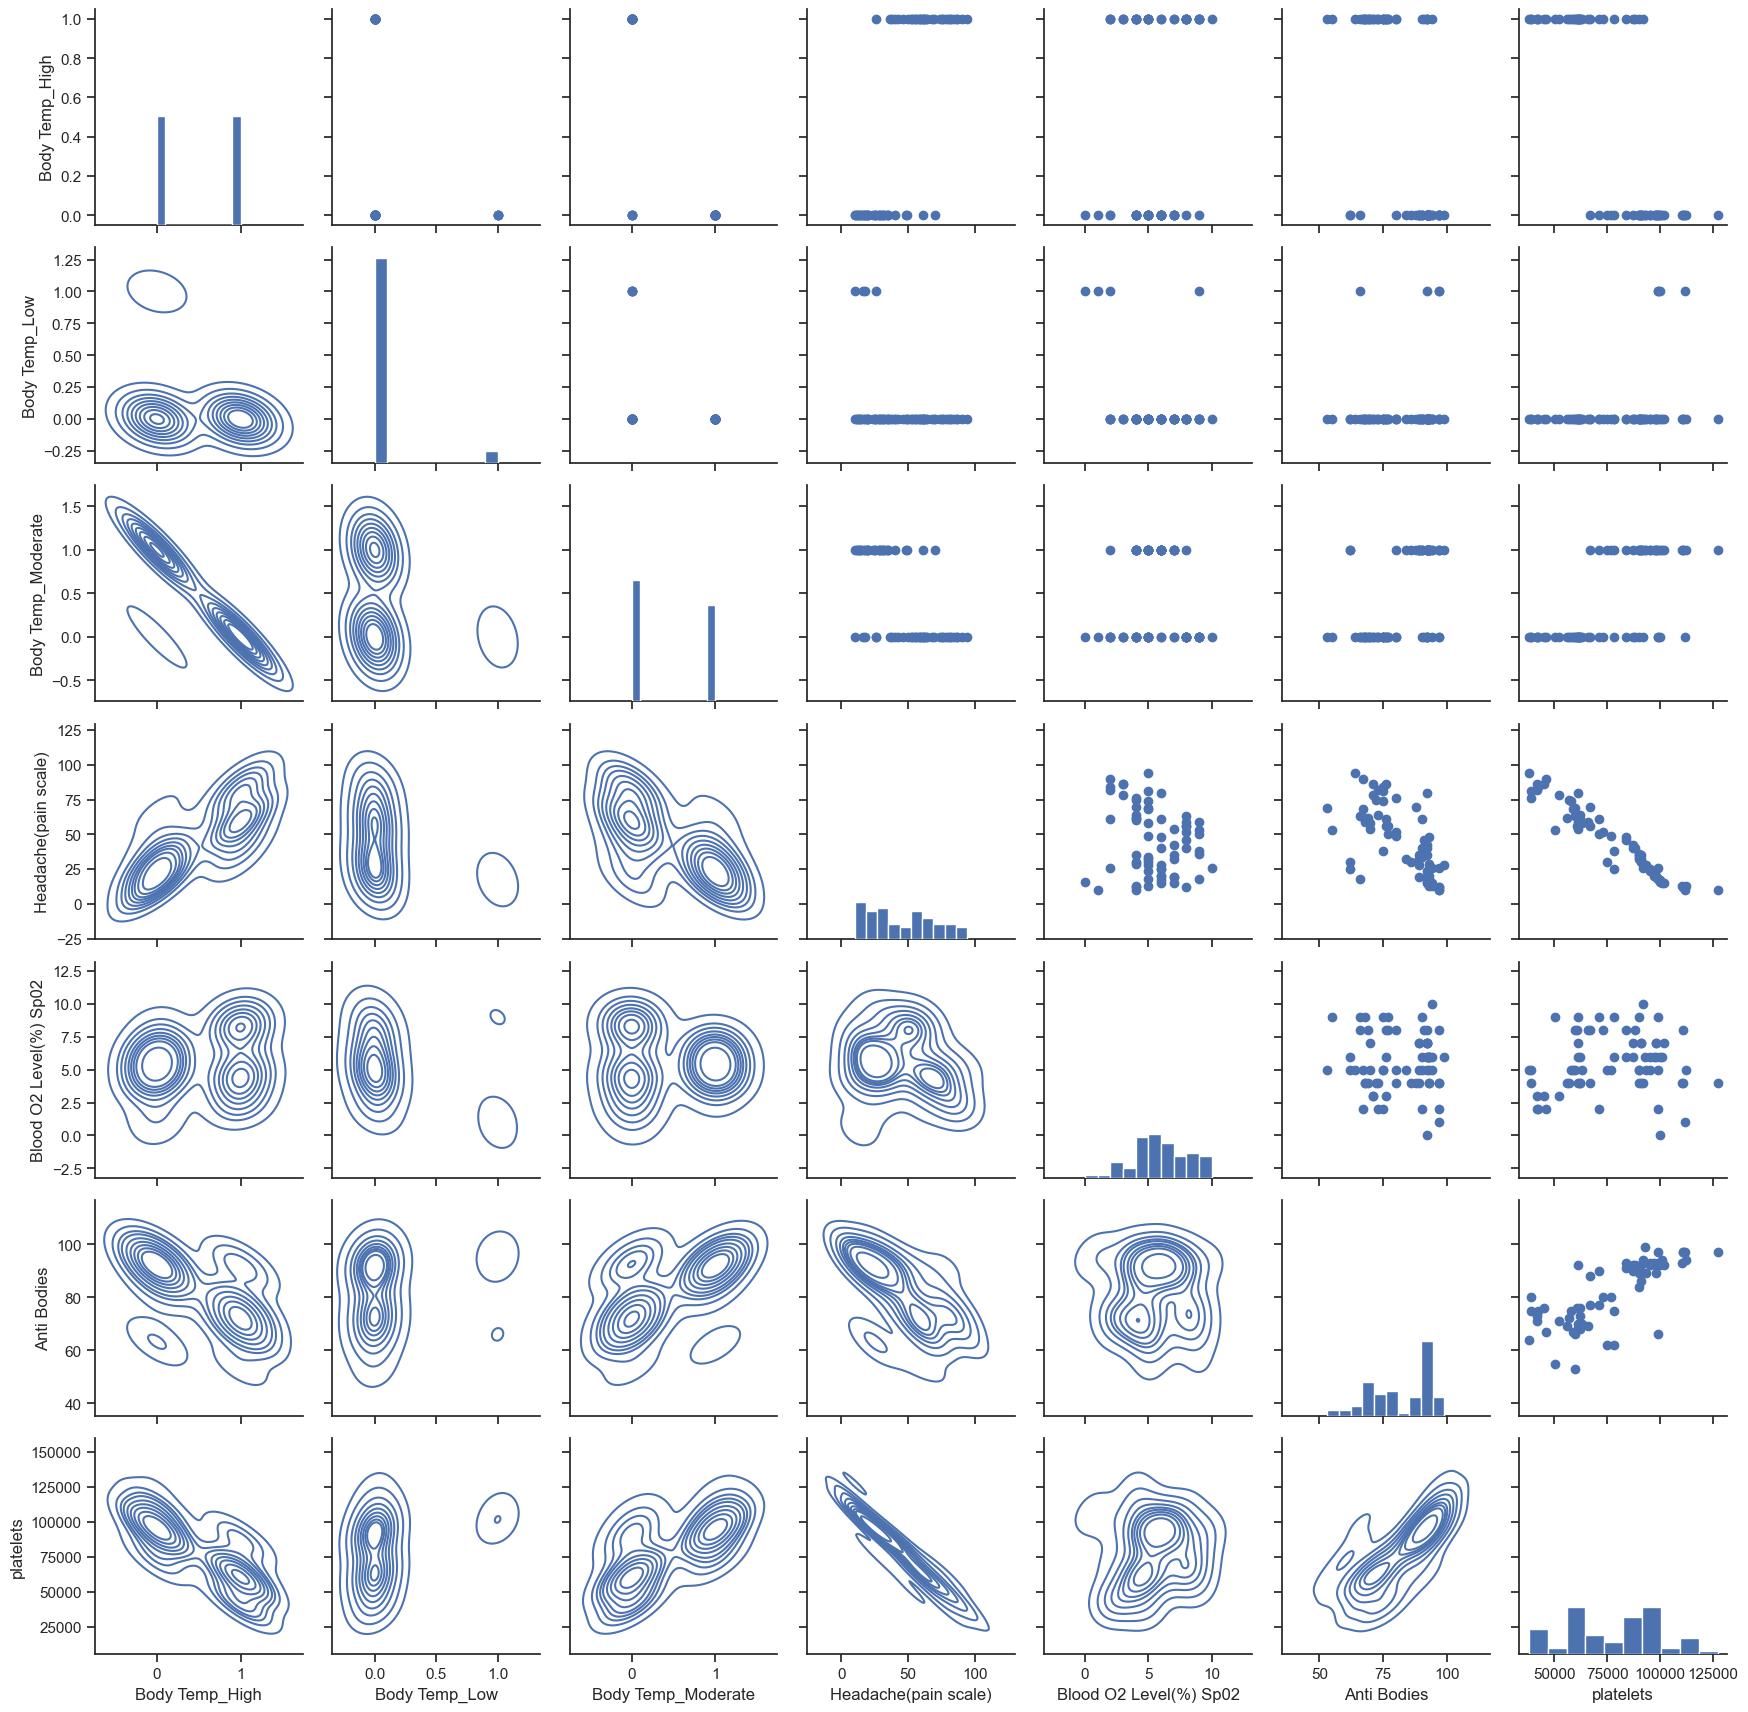

In [22]:
sns.set(style="ticks")
g = sns.PairGrid(X_df)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [6]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[ 8.821  9.2  ]
 [11.996 12.   ]
 [ 8.763  9.   ]
 [12.146 12.8  ]
 [ 6.974  9.2  ]
 [13.285 14.2  ]
 [13.123 11.8  ]
 [13.077 14.   ]
 [ 8.669  6.9  ]
 [17.241 18.8  ]
 [12.629 11.1  ]
 [13.259 13.2  ]
 [12.555 14.7  ]
 [20.772 16.9  ]]


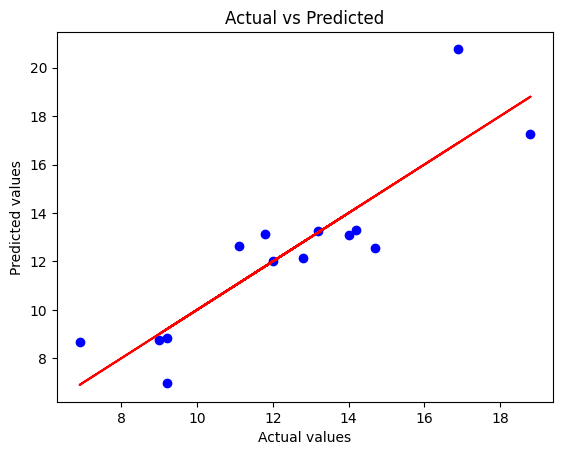

In [7]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

(array([1., 3., 0., 1., 3., 2., 2., 0., 1., 1.]),
 array([ 6.9 ,  8.09,  9.28, 10.47, 11.66, 12.85, 14.04, 15.23, 16.42,
        17.61, 18.8 ]),
 <BarContainer object of 10 artists>)

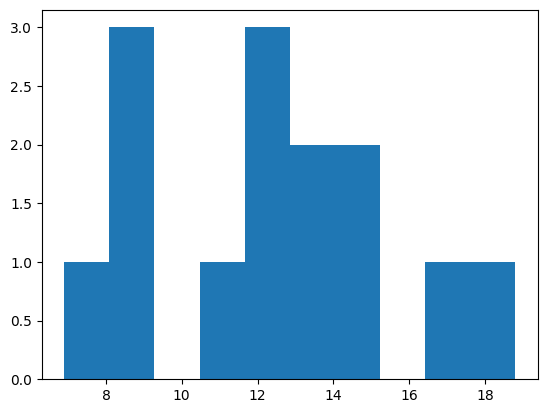

In [8]:
plt.hist(y_test)

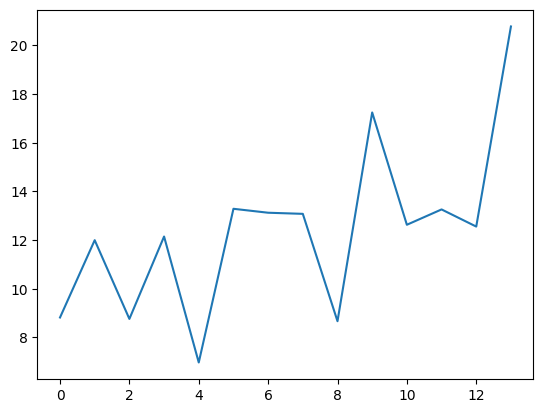

In [9]:
plt.plot(y_pred)

(array([1., 3., 0., 2., 6., 0., 0., 1., 0., 1.]),
 array([ 6.974,  8.354,  9.733, 11.113, 12.493, 13.873, 15.253, 16.632,
        18.012, 19.392, 20.772]),
 <BarContainer object of 10 artists>)

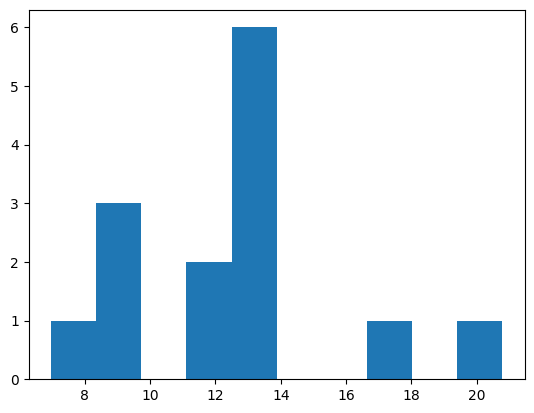

In [10]:
plt.hist(y_pred)